# Exploratory Data Analysis 

The first step is to load the data from the structured files, as they're organized by search terms, we can traverse all the partition files and start the analysis

In [156]:
import os
import pandas as pd
import matplotlib.pyplot as plt

from ast import literal_eval

def load_data(directory):
    data = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith(".csv"):
                filepath = os.path.join(root, file)
                df = pd.read_csv(filepath, low_memory=False)
                data.append(df)
    return pd.concat(data, ignore_index=True)

directory = "../data/data_warehouse/mental health"
df = load_data(directory)

### Top 10 Publishers

The following graphic shows the top 10 publishers for the mental health topic over the last year

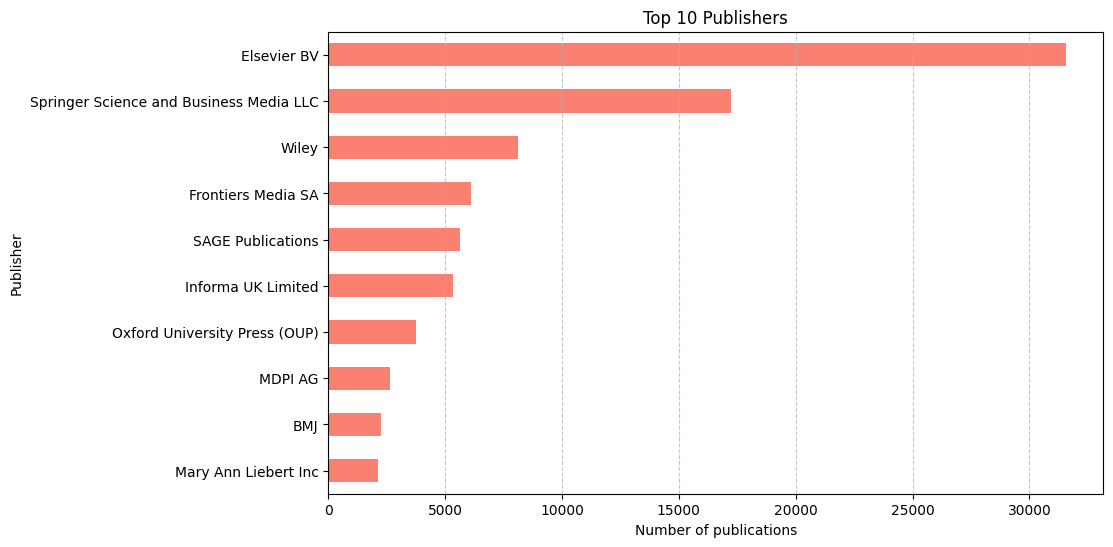

In [157]:
publisher_counts = df['publisher'].value_counts().head(10)
publisher_counts.plot(kind='barh', figsize=(10, 6), color='salmon')
plt.title('Top 10 Publishers')
plt.xlabel('Number of publications')
plt.ylabel('Publisher')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

### Top 10 Authors

This graphic shows the top 10 authors that have contributed to the mental health topic in the same period of time

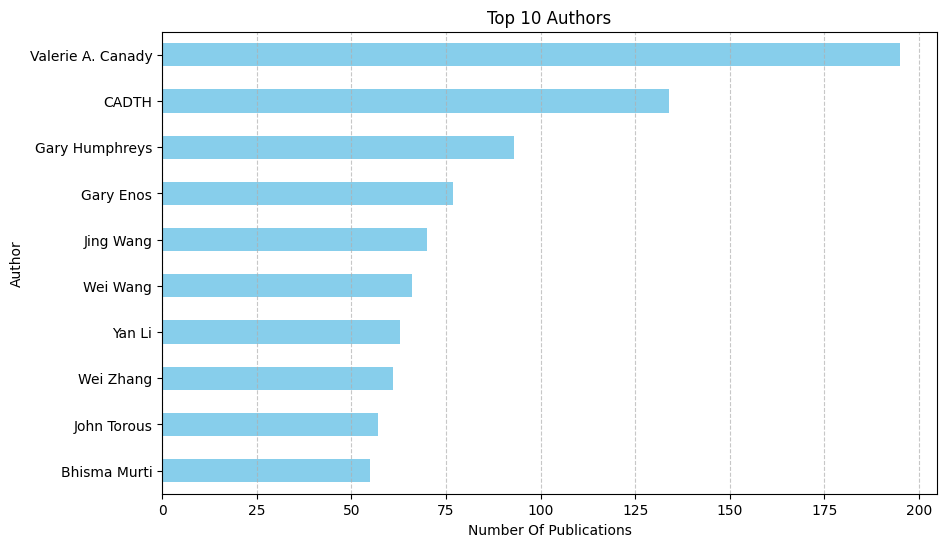

In [158]:
authors_df = df['author'].apply(lambda x: literal_eval(x))
# Flatten the list of authors
all_authors = [author for sublist in authors_df for author in sublist]

author_counts = pd.Series(all_authors).value_counts().head(10)
author_counts.plot(kind='barh', figsize=(10, 6), color='skyblue')
plt.title('Top 10 Authors')
plt.xlabel('Number Of Publications')
plt.ylabel('Author')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

### Distribution of types

This graphic show the indexed publication type related to the topic, and it clearly shows that journal articles are the most used type of publication type

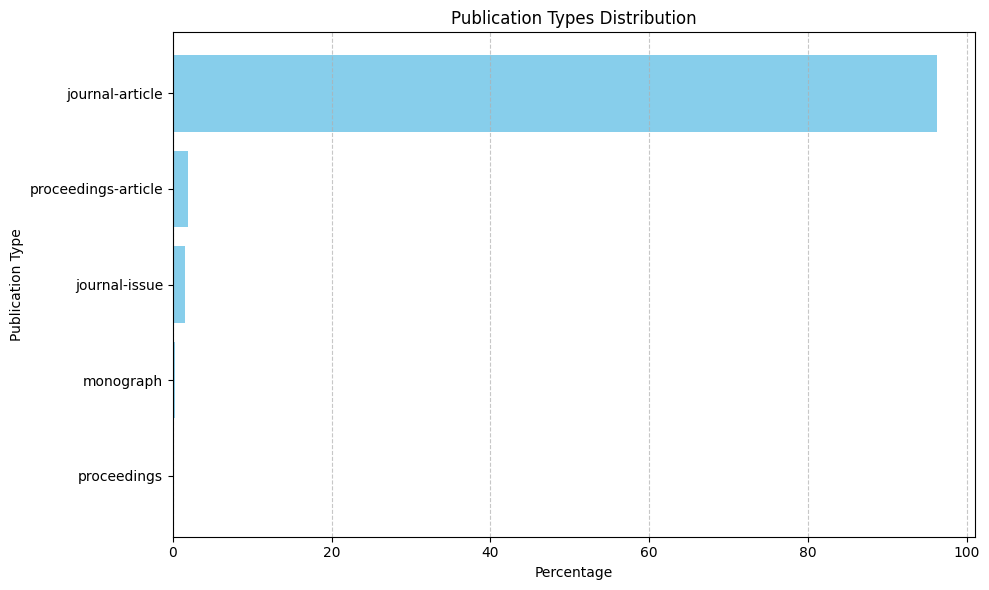

In [159]:
publication_types = df["type"].value_counts()
publication_type_percentages = publication_types / publication_types.sum() * 100

# Plot the distribution of publication types using a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(publication_type_percentages.index, publication_type_percentages.values, color='skyblue')
plt.title('Publication Types Distribution')
plt.xlabel('Percentage')
plt.ylabel('Publication Type')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Top 10 Subjects
This graphic shows the top 10 subjects related to publications done about the topic "Mental Health"

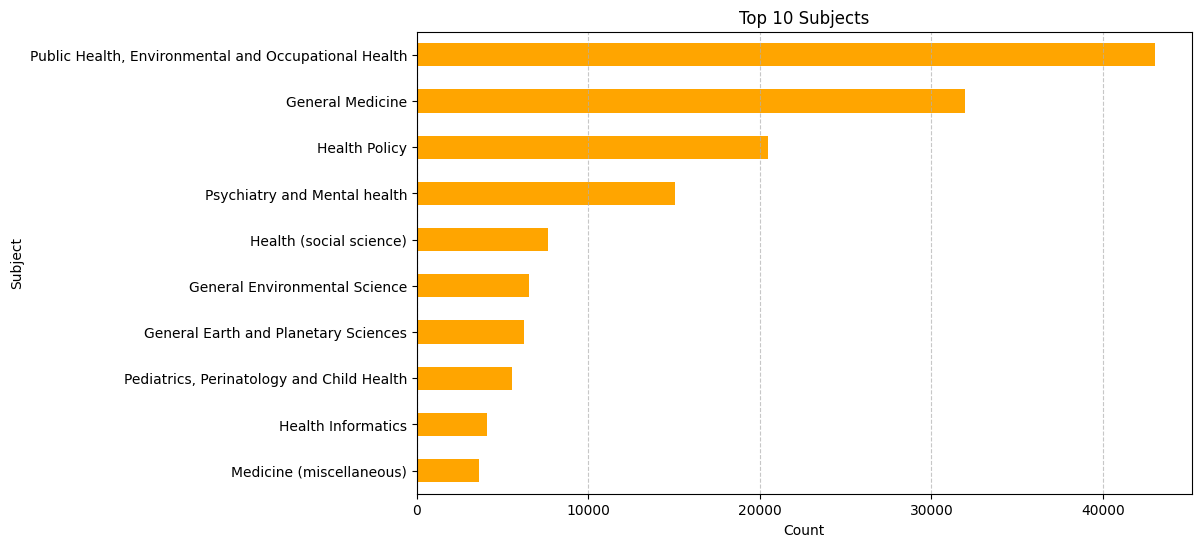

In [160]:
# Convert string representation of subjects to list
df['subject'] = df['subject'].fillna("[]").apply(lambda x: literal_eval(x))

# Flatten the list of subjects
all_subjects = [subject for sublist in df['subject'] for subject in sublist]

subject_counts = pd.Series(all_subjects).value_counts().head(10)
subject_counts.plot(kind='barh', figsize=(10, 6), color='orange')
plt.title('Top 10 Subjects')
plt.xlabel('Count')
plt.ylabel('Subject')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

### Number of publications over time

The following histogram shows the number of publications made daily

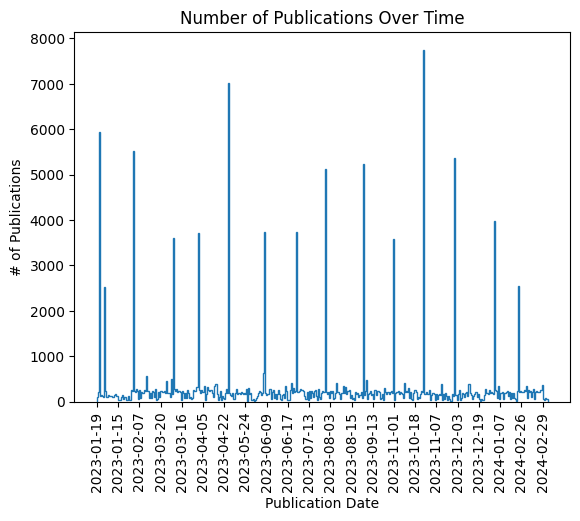

In [196]:
import numpy as np

dates = df["published-date"].sort_index(ascending=True)
plt.hist(dates, bins=len(dates.unique()), histtype="step")
plt.xticks(np.arange(0,len(dates.unique()),20), rotation='vertical')
plt.title("Number of Publications Over Time")
plt.xlabel("Publication Date")
plt.ylabel("# of Publications")
plt.show()

### References Count vs. Is Referenced By:

This graph shows the correlation between the number of reference in a publication versus the number of times it has been referenced 

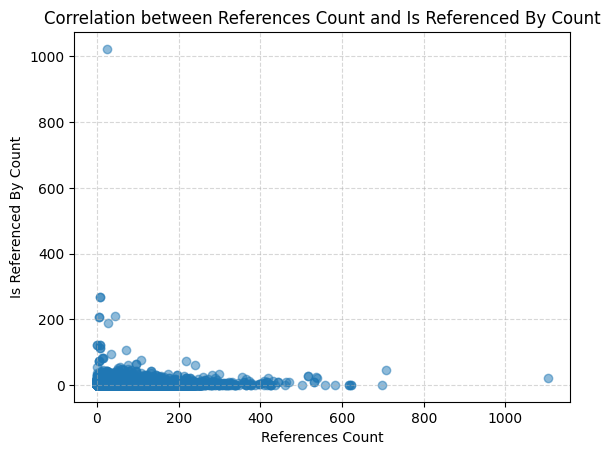

In [162]:
plt.scatter(df['references-count'], df['is-referenced-by-count'], alpha=0.5)
plt.title('Correlation between References Count and Is Referenced By Count')
plt.xlabel('References Count')
plt.ylabel('Is Referenced By Count')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()